In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Setting up parameters

In [24]:
CAPTURE_FRAMES = 100
ERODE_SIZE = 2
LIVE_CAPTURE = False
IMG_PATH = "images/OKThumb.jpg"

### Capturing a frame

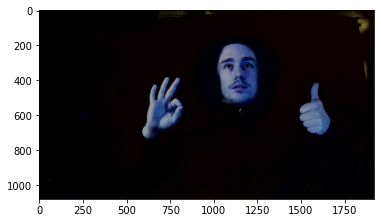

In [25]:
if not LIVE_CAPTURE:
    frame = cv2.imread(IMG_PATH)
    plt.imshow(frame)

In [26]:
if LIVE_CAPTURE:
    cam = cv2.VideoCapture(0)
    ret, frame = cam.read()
    cam.release()
    plt.imshow(frame)

### Making sure we have a frame

In [27]:
if LIVE_CAPTURE and not ret:
    print("failed to grab frame")

### Converting image to Black and White

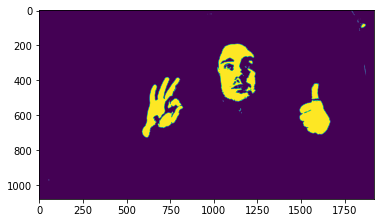

In [28]:
grayImage = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
(thresh, hand_mask) = cv2.threshold(grayImage, 80, 255, cv2.THRESH_BINARY)
plt.imshow(hand_mask)

### Finding contours in image

In [29]:
contours, _ = cv2.findContours(hand_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contour_masked = hand_mask.copy()

### Extracting hand sized contours

In [30]:
hands = []
for contour in contours:
    if 2000 <= cv2.contourArea(contour):
        cv2.drawContours(frame, [contour], 0, (127, 127, 127), 3)
        hull_shape = cv2.convexHull(contour, returnPoints=True)
        
        hull = cv2.convexHull(contour, returnPoints=False)

        cv2.drawContours(frame, [hull_shape], 0, (100, 100, 100), 3)
        
        for point in contour:
            if not(point[0] in hull):
#                 print(point)
#                 print(tuple(point[0]))
                cv2.circle(frame, tuple(point[0]), 5, [0, 0, 200], -1)
        print("Reached")
        defects = cv2.convexityDefects(contour, hull)
        for point in defects:
            # print(point[0, 3])
            if point[0, 3] > 500:
                defect = tuple(contour[point[0, 2]][0])
                start = tuple(contour[point[0, 0]][0])
                end = tuple(contour[point[0, 1]][0])
                dist = np.sqrt((start[0] - end[0])**2 + (start[1] - end[1])**2)
                print(f"norm{dist}")
                if dist > 3:
                    # print(defect)
                    cv2.line(frame, start, end, [255, 0, 0], 5)
                    cv2.circle(frame, defect, 5, [0, 0, 255], -1)
        hands.append(cv2.boundingRect(contour))



Reached
norm31.064449134018133
norm59.0592922409336
norm50.0
norm40.8166632639171
norm33.421549934136806
norm32.7566787083184
norm19.0
norm5.656854249492381
norm7.615773105863909
norm9.055385138137417
norm97.04638066409278
norm11.045361017187261
Reached
norm30.675723300355934
norm10.295630140987
norm114.49017425089369
norm22.847319317591726
norm17.26267650163207
norm20.248456731316587
norm35.510561809129406
norm72.56031973468694
norm21.095023109728988
norm16.64331697709324
Reached
norm10.0
norm2.23606797749979
norm5.0
norm3.605551275463989
norm11.661903789690601
norm12.083045973594572
norm53.150729063673246
norm35.12833614050059
norm79.0
norm8.246211251235321
Reached
norm78.54934754662193
norm215.74522010927612
norm159.76232346833217
norm149.83324063771698
norm55.94640292279746
norm57.0350769263968
Reached
norm13.601470508735444
norm8.06225774829855
norm32.31098884280702
norm36.49657518178932
norm101.9803902718557
norm20.615528128088304
norm11.180339887498949
norm20.591260281974
norm29

### Displaying Extracted images

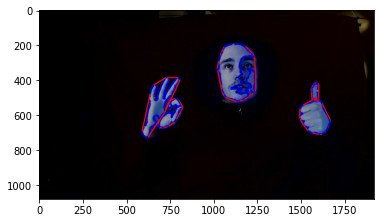

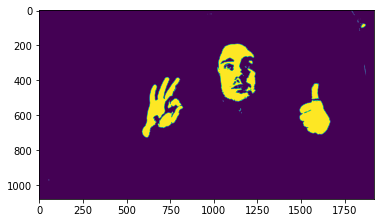

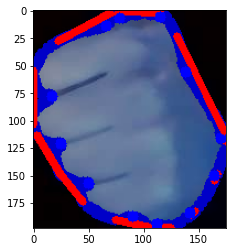

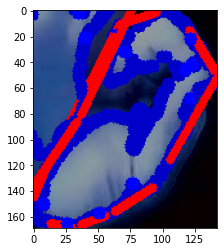

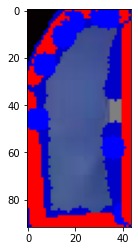

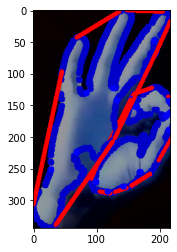

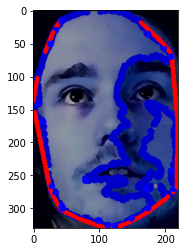

In [31]:
plt.figure()
plt.imshow(frame)

plt.figure()
plt.imshow(contour_masked)
for hand_index in range(len(hands)):
    x, y, w, h = hands[hand_index]
    plt.figure()
    print()
    plt.imshow(frame[y:y+h, x:x+w])